# *Introduction to Machine Learning* Algorithms and Realizations 3

## By Jiaheng Cui
>In this chapter, we'll focus on an Linear Models. We'll discuss Linear Regression, its regularization Ridge Regression and Lasso Regression, Linear Classification, Logistic Regression and finally Linear Discriminant Analysis.

## 1.Linear Regression
### (1) Linear models
We have a training set $S = \left\{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\right\}$, where $x_i \in R^{p \times 1} ,y_i \in R$.

Linear Models are the simpliest models, assuming that the relationship between $y$ and $x$ is linear, which is:
$$y = X\beta + \epsilon$$

where
$y = (y_1, y_2, ..., y_n)^T$, $X = (1, x_1, x_2, ..., x_n)^T = \left[\begin{matrix} 1 & x_{11} & \cdots & x_{1p}\\ 1 & x_{21} & \cdots & x_{2p}\\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & \cdots & x_{np} \\ \end{matrix}\right]$, $\beta = (\beta_0, \beta_1, \beta_2, ..., \beta_p)^T$, $\epsilon = (\epsilon_1, \epsilon_2, ..., \epsilon_n)^T$.

Notes:

<1> What is the point of $\epsilon$?

$\epsilon$ is an error term, or "noise". Obviously, not every training dataset is perfectly on a straight line, some of them just lie in a shape that look like a straight line that can "go through" them (and even more of them do not fit a linear model). However, if the model just looks like $y = X\beta$, we cannot interpret this result.

If we assume that there were noises between the observed value and its predicted value according to the linearity, it could be interpreted. Consider $x_i$, the difference between the predicted value of $y_i$ (denoted as $\hat{y_i}$) and the true value $y_i$ is actually an estimation of $\epsilon_i$.

<2> Why do we have a "1" in the front of every row?

As we can see, if $X$ doesn't have a "1" in the front of each row, the straight line must go through the origin. The "1"s just make sure that the bias term (or intercept) $\beta_0$ exists.

<3> Assumptions of a linear model:

The rows of $X$, which is $\left \{x_i\right\}_{i=1}^{n}$, are independent.

$X$ must have full rank (e.g. $n \ge p+1$), otherwise we may face the problem of multicollinearity or that $X^T X$ is not invertible.

$\epsilon_i$ are independent, with $E(\epsilon_i) = 0$, $Var(\epsilon_i) = \sigma^2$ (the assumption of $\epsilon_i$ has a constant variance is called homoscedasticity).

### (2) Ordinary Least Squares (OLS)
Suppose we choose MSE as our loss function, which is $MSE(\beta) = \frac{1}{n} \parallel X \beta - y\parallel^2$. We want to find the $\beta$ that minimizes MSE, which leads to the following optimization problem:
$$\hat{\beta} = \mathop{\arg\min}\limits_{\beta \in R^{n \times 1}} \frac{1}{n} \parallel X \beta - y\parallel^2$$

Note that MSE is a convex function, so we can compute $\hat{\beta}$ by letting $ \frac{\partial MSE}{\partial \beta}|_ \hat{\beta} = 0$.

From $\frac{\partial MSE}{\partial \beta}|_ \hat{\beta} = 0$ can we get $(X^T X)\hat{\beta} = X^Ty$. Since $X$ has full rank, $X^T X$ is invertible. Then the final result would be: $$\hat{\beta} = (X^T X)^{-1}X^T y$$

### (3) Algorithm
Input: training instances $X = \left[\begin{matrix}  x_{11} & \cdots & x_{1p}\\ \vdots & \ddots & \vdots \\ x_{n1} & \cdots & x_{np} \\ \end{matrix}\right]$, label vector $y = (y_1, y_2, ..., y_n)^T$.

Output: parameter vector $\hat{\beta}$

Step1: load $X$ and $y$, note that there isn't a "1" in the front of each row, we'll add them manually. 

Step2: let $\hat{\beta} = (X^T X)^{-1}X^T y$, so the model we trained is $y = X \hat{\beta}$.

### (4) Code

In [1]:
import numpy as np

In [2]:
class Linear_Regressor():
    def __init__(self, X, y):
        self.X = np.c_[np.ones(X.shape[0]), X]#We'll add the "1"s here
        self.y = y
        beta_hat = np.zeros(X.shape[0])
        
    def OLS(self, X, y):
        return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)#np.linalg.inv(A) can solve the inverse of A
        
    def train(self):
        self.beta_hat = self.OLS(self.X, self.y)
        
    def fit(self, X_new):
        return np.c_[np.ones(X_new.shape[0]), X_new].dot(self.beta_hat)#We'll add the "1"s here since X_new is a new training instance matrix

We'll train a linear regression model `lm` using the following training set $S = {(X,y)}$:

In [3]:
X = np.array([25,27,31,33,35])
y = np.array([110,115,155,160,180])

lm = Linear_Regressor(X,y)
lm.train()

We can get the parameter vector $\hat{\beta}$ by calling `lm.beta_hat`:

In [4]:
lm.beta_hat

array([-73.72093023,   7.20930233])

We have a new data set $X_{new}$, let's see its predictions using our regression model by calling `lm.fit(X_new)`:

In [5]:
X_new = np.array([1,2])
lm.fit(X_new)

array([-66.51162791, -59.30232558])

## 2.Regularization
### (1) Basic thoughts
In the above OLS model, we assume that $X$ is full-rank so that $X^T X$ is invertible. However in real-life problems, sometimes the number of features are greater than the number of samples, i.e. $n \lt p$. Here $\hat{\beta}$ has no explicit solution, and there may beseveral $\hat{\beta}$ s. To avoid this, we could use a method called **regularization**.

We'll add a **penalty term** to the loss function (we'll still use MSE as our loss function), aiming at restricting every $\beta_i$ from being too large while effectively avoiding overfitting. The penalty term could be a norm of $\beta$. This leads to ridge regression and lasso regression.

### (2) Ridge regression
We insert $\parallel \beta \parallel_2$ into the loss function, where our new loss function is $loss(\beta) = MSE + \lambda \parallel \beta \parallel^2_2 = \frac{1}{n}(y-X\beta)^T (y-X\beta) + \lambda \beta^T \beta$. In fact, we can just get rid of $\frac{1}{n}$ to make it easier to compute, and let $$loss(\beta) = (y-X\beta)^T (y-X\beta) + \lambda \beta^T \beta$$

Here $\lambda \ge 0$ is called the regularization parameter. If $\lambda$ is relatively large, then $\beta_i$ would be smaller, and the impact of multicollinearity will be reduced, meanwhile $\hat{y}$ and $y$ would differ more; when $\lambda = 0$, ridge regression becomes linear regression. Hence choosing a proper $\lambda$ is essential, which could be done by grid search.

Moreover, when we use $loss(\beta)$ as our loss function, $\hat{\beta} = (X^T X+\lambda I)^{-1}X^Ty$, where $I$ is the identity matrix of size $p+1$. When $X^T X$ is not invertible, $X^T X+\lambda I$ is always invertible, so we can avoid the problem of non-invertible $X^T X$.

### (3) Lasso regression* (not covered in the course)
Insead of adding $\parallel \beta \parallel_2$, we add $\parallel \beta \parallel_1$ into the loss function. The new loss function is $$loss(\beta) = (y-X\beta)^T (y-X\beta) + \lambda \sum^n_{i=0}| \beta_i |$$

Lasso regression tends to result in some weights ($\beta_i$) being exactly 0, which makes it easier to do feature selection (or dimension reduction), while ridge regression could only make weights close to 0.

However, $\parallel \beta \parallel_1$ is not differentiable at point $0$. Thus, we don't have a explicit formula of $\beta$, we could only use a iterative method to solve it. Since it's not differentiable, we cannot use gradient descent or Newton's method. The common methods solving lasso regression problems include coordinate descent, subgradient methods and least-angle regression.

### (4) Algorithms and Codes

#### <1> Ridge regression
Input: training instances $X = \left[\begin{matrix}  x_{11} & \cdots & x_{1p}\\ \vdots & \ddots & \vdots \\ x_{n1} & \cdots & x_{np} \\ \end{matrix}\right]$, label vector $y = (y_1, y_2, ..., y_n)^T$, regularization parameter $\lambda$.

Output: parameter vector $\hat{\beta}$

Step1: load $X$ and $y$, note that there isn't a "1" in the front of each row, we'll add them manually. 

Step2: let $\hat{\beta} = (X^T X + \lambda I)^{-1}X^T y$, so the model we trained is $y = X \hat{\beta}$.

In [6]:
class Ridge_Regressor():
    def __init__(self, X, y, par_lambda):
        self.X = np.c_[np.ones(X.shape[0]), X]
        self.y = y
        self.par_lambda = par_lambda
        beta_hat = np.zeros(X.shape[0])
        
    def train(self):
        self.beta_hat = np.linalg.inv(self.X.T.dot(self.X) + self.par_lambda * np.identity(self.X.shape[1])).dot(self.X.T).dot(self.y)
        #np.identity(n) creates an identity matrix of size n
        
    def fit(self, X_new):
        return np.c_[np.ones(X_new.shape[0]), X_new].dot(self.beta_hat)

We'll train a ridge regression model `rlm` using the following training set $S = {(X,y)}$:

In [7]:
X = np.array([25,27,31,33,35])
y = np.array([110,115,155,160,180])

rlm = Ridge_Regressor(X,y,0.1)
rlm.train()

We can get the parameter vector $\hat{\beta}$ by calling `rlm.beta_hat`:

In [8]:
rlm.beta_hat

array([-31.31989943,   5.82603634])

As we can see, the absolute values of $\beta_i$s are indeed closer to 0 than traditional OLS.

We have a new data set $X_{new}$, let's see its predictions using our regression model by calling `rlm.fit(X_new)`:

In [9]:
X_new = np.array([1,2])
rlm.fit(X_new)

array([-25.49386309, -19.66782675])

#### <2> Lasso regression*
Since lasso regression is not covered in the course, we just list two iterative methods from Wikipedia:

Proximal Gradient Method: https://en.wikipedia.org/wiki/Proximal_gradient_methods_for_learning#Lasso_regularization

Least-Angle Regression (LARS): https://en.wikipedia.org/wiki/Least-angle_regression

And those who are interested in the source code could find it from sklearn:
https://github.com/scikit-learn/scikit-learn

Some basic examples using lasso regression:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

## 3.Linear Classification
Note: For the following classification problems, we only focus on **binary classification**.

### (1) Linear model using OLS
If we have two classes of sample, Positive and Negative, we can set $y = \begin{cases} 1 & x \in Positive \\ 0 & x \in Negative \end{cases}$. Then we can use OLS to train a linear model $y = X\beta - 0.5$, recall that when using OLS, $\hat{\beta} = (X^T X)^{-1} X^T y$. If $\hat{y} \gt 0$, the sample is more likely to be in the Positive Class; if$\hat{y} \lt 0$, it's more likely to be in the Negative Class; when$\hat{y} = 0$, it's hard to classify, we may leave it alone, or just throw it into a random class. This is how we use a linear model to do classification.

Note: the **threshold** we use here is 0.5, which suggest that $class(x) = \begin{cases} Positive & x^T \beta \gt 0.5 \\ Negative & x^T \beta \lt 0.5 \end{cases}$. In real cases, the threshold may vary.

### (2) Algorithm
Input: training instances $X = \left[\begin{matrix}  x_{11} & \cdots & x_{1p}\\ \vdots & \ddots & \vdots \\ x_{n1} & \cdots & x_{np} \\ \end{matrix}\right]$, label vector $y = (y_1, y_2, ..., y_n)^T$ ($y$ should be a $0-1$ vector), test instance $x$.

Output: the class where $x$ belongs to.

Step1: load $X$ and $y$, note that there isn't a "1" in the front of each row, we'll add them manually. 

Step2: let $\hat{\beta} = (X^T X)^{-1}X^T y$, so the model we trained is $y = X \hat{\beta} - 0.5$.

Step3: when classifying the test instance $x$, add a "1" in the front of it, and calculate $\hat{y} = x^T \hat{\beta} - 0.5$. If $\hat{y} = 0$, $x$ cannot be classified, print "Cannot be classified."; otherwise, let $class = \begin{cases} Positive & \hat{y} \gt 0 \\ Negative & \hat{y} \lt 0 \end{cases}$.

### (3) Code

In [10]:
class Linear_Classifier():
    def __init__(self, X, y):
        self.X = np.c_[np.ones(X.shape[0]), X]
        self.y = y
        beta_hat = np.zeros(X.shape[0])
        
    def OLS(self, X, y):
        return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    def train(self):
        self.beta_hat = self.OLS(self.X, self.y)
        
    def fit(self, X_new):
        self.y_hat = np.c_[np.ones(X_new.shape[0]), X_new].dot(self.beta_hat)
        self.c = np.zeros(self.y_hat.shape[0])
        for i in range(self.y_hat.shape[0]):
            if(self.y_hat[i] == 0.5):
                self.c[i] = "Cannot be classified."
            else:
                self.c[i] = True if self.y_hat[i] > 0.5 else False
        return self.c

We'll train a linear classifier `lc` using the following training set $S = {(X,y)}$:

In [11]:
X = np.array([25,27,31,33,35])
y = np.array([0,0,1,1,0])
lc = Linear_Classifier(X,y)
lc.train()

We can get the parameter vector $\hat{\beta}$ by calling `lc.beta_hat`:

In [12]:
lc.beta_hat

array([-1.18023256,  0.05232558])

We have a new data set $X_{new}$, let's see its predictions using our regression model by calling `lc.fit(X_new)`:

In [13]:
X_new = np.array([10,20,30,40,50])
lc.fit(X_new)

array([0., 0., 0., 1., 1.])

## 4.Logistic regression:
### (1) Basic thoughts
What if we want the probability of $x$ belongs to the Positive Class rather than only do the classification? To solve this problem, we need to use a continuous function. We introduce the Sigmoid activation function: $$S(x) = \frac{1}{1+e^{-x}}$$

#### <1> Properties of Sigmoid function:
- $x$ could be any real number when calculating $S(x)$, and projects $(- \infty, + \infty)$ to $(0,1)$.
- $S(0) = 0.5$.
- $S(x)$ is strictly monotonically increasing along the real axis.
- When $x$ is very close to $- \infty$, $S(x)$ would be close to $0$; when $x$ is very close to $+ \infty$, $S(x)$ would be close to $1$.
- $S(x)$ is smooth and derivable at every point, where $S'(x) = \frac{e^{-x}}{(1+e^{-x})^2}= S(x)(1-S(x))$.

#### <2> A picture of Sigmoid function:

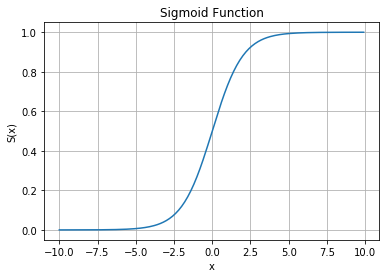

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
    return 1/(1 + np.exp(-x))
 
sigmoid_inputs = np.arange(-10,10,0.1)
sigmoid_outputs = sigmoid(sigmoid_inputs)

plt.plot(sigmoid_inputs,sigmoid_outputs)
plt.xlabel("x")
plt.ylabel("S(x)")
plt.title("Sigmoid Function")
plt.grid(True)
plt.show()

### (2) Logistic Regression
The logistic regression model is $$y = S(\beta^T x) = \frac{1}{1+e^{-\beta^T x}}$$

Due to its properties, $y$ could be seen as the probability of $x$ being classified into the Positive Class. Thus $p(y = 1|x; \beta) = \frac{1}{1+e^{-\beta^T x}}$, $p(y = 0|x; \beta) = 1 - p(y=1|x; \beta)= \frac{e^{-\beta^T x}}{1+e^{-\beta^T x}}$.

The result of the model is a continuous probability, so it seems like a regression model. However, we always set a threshold (e.g. 0.5), and use logistic regression to do the following classification:

$$class = \begin{cases} Positive & \hat{y}\gt 0.5 \\ Negative & \hat{y} \lt 0.5 \end{cases}$$

We want to find a Maximum Likelihood Estimate (MLE) $\hat{\beta}$ to estimate $\beta$, which would make the prediction accuracy the largest:

The likelihood function is $L(\beta) = \prod^n_{i=1}p(y_i|x_i;\beta) = \prod^n_{i=1}\left[p(y = 1|x; \beta)^{y_i} p(y = 0|x; \beta)^{1-y_i}\right]$.

The log likelihood function is $l(\beta) = ln L(\beta) = \sum^n_{i=1} \left[y_i ln p(y = 1|x; \beta) + (1-y_i) ln p(y = 0|x; \beta)\right]$.

$l(\beta)$ is a concave function over $R^{(p+1) \times 1}$, and we want to find the maximum. Let $J(\beta) = -l(\beta)$, then $J(\beta)$ is a convex function and we want to find the minimum of it. So we can use gradient descent or Newton's method to find $\hat{\beta}$.

Note that the gradient vector of $J(\beta)$ is $g(\beta) = \nabla J(\beta) = \frac{1}{n}X^T (S(X \beta)-y)$.

### (3) Algorithm
Input: training instances $X = \left[\begin{matrix}  x_{11} & \cdots & x_{1p}\\ \vdots & \ddots & \vdots \\ x_{n1} & \cdots & x_{np} \\ \end{matrix}\right]$, label vector $y = (y_1, y_2, ..., y_n)^T$ ($y$ should be a $0-1$ vector), test instance $x$.

Output: the probability of $x$ belongs to the Positive Class, and the class where x belongs to.

Step1: load $X$ and $y$, note that there isn't a "1" in the front of each row, we'll add them manually. 

Step2: let $S(x,\beta) = \frac{1}{1+e^{-\beta^T x}}$, $J(\beta) = -\sum^n_{i=1} \left[y_i ln S(x_i,\beta) + (1-y_i) (1-S(x_i,\beta))\right]$.

Step3: use gradient descent to find $\hat{\beta}$.

Step4: when classifying the test instance $x$, add a "1" in the front of it, and calculate $\hat{y} = \frac{1}{1+e^{- \hat{\beta}^ T x}}$. If $\hat{y} = 0.5$, $x$ cannot be classified, print "Cannot be classified."; otherwise, let $class = \begin{cases} Positive & \hat{y} \gt 0.5 \\ Negative & \hat{y} \lt 0.5 \end{cases}$.

### (4) Code

In [15]:
class Logistic_Regressor():
    def __init__(self, X, y):
        self.X = np.c_[np.ones(X.shape[0]), X]
        self.y = y
        beta_hat = np.zeros(X.shape[0])
        
    def sigmoid(self, t):
        return 1/(1 + np.exp(-t))  
        
    def J(self, beta, X, y):
        y_hat = self.sigmoid(X.dot(beta))
        return - np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

    def g(self, beta, X, y):
        return X.T.dot(self.sigmoid(X.dot(beta)) - y) / X.shape[0]

    def gradient_descent(self, X, y, eps, beta_0, eta, k_max):
        beta_k = beta_0
        k = 0
    
        for k in range(k_max + 1):
            g_k = self.g(beta_k, X, y)
        
            if(np.linalg.norm(g_k) < eps):
                return beta_k
                break
        
            else:
                p_k = - g_k
                beta_k_new = beta_k + eta * p_k
            
                if(np.linalg.norm(self.J(beta_k_new, X, y) - self.J(beta_k, X, y)) < eps or np.linalg.norm(beta_k_new - beta_k) < eps):
                    return beta_k_new
                    break
                
                else:
                    beta_k = beta_k_new
                    if(k == k_max):
                        return "Does not converge, calculation failed."
    
    def train(self, eps = 1e-5, eta = 0.01, k_max = 100000):
        beta_0 = np.zeros(self.X.shape[1])
        self.beta_hat = self.gradient_descent(self.X, self.y, eps, beta_0, eta, k_max)
        
    def fit(self, X_new):
        self.y_hat = self.sigmoid(np.c_[np.ones(X_new.shape[0]), X_new].dot(self.beta_hat))
        self.c = np.zeros(self.y_hat.shape[0])
        for i in range(self.y_hat.shape[0]):
            if(self.y_hat[i] == 0):
                self.c[i] = "Cannot be classified."
            else:
                self.c[i] = True if self.y_hat[i] > 0.5 else False
        return np.array([self.y_hat, self.c])

We'll train a logistic regressor `logistic` using the following training set $S = {(X,y)}$:

In [16]:
X = np.array([25,27,31,33,35])
y = np.array([0,0,1,1,0])
logistic = Logistic_Regressor(X,y)
logistic.train()

We can get the parameter vector $\hat{\beta}$ by calling `logistic.beta_hat`:

In [17]:
logistic.beta_hat

array([-7.30274442,  0.22315088])

We have a new data set $X_{new}$, let's see its predictions using our regression model by calling `logistic.fit(X_new)`:

In [18]:
X_new = np.array([10,20,30,40,50])
logistic.fit(X_new)

array([[0.00623554, 0.05521479, 0.35246579, 0.83524847, 0.97926135],
       [0.        , 0.        , 0.        , 1.        , 1.        ]])

## 5.Linear Discriminant Analysis (LDA)
### (1) Basic thoughts
Linear Discriminant Analysis wants to find a straight line $y = \beta^T x$ that satisfies: when $X$ is projected to this line, the two groups $X_1 \in R^{n_1 \times (p+1)}$ and $X_2 \in R^{n_2 \times (p+1)}$ $(n_1 + n_2 = n)$ should be apart while within the same group, the samples should stay together.

Note: LDA has the assumption that the covariance matrix of the two groups $\Sigma_1$ and $\Sigma_2$ are equal and full-rank.

Let $J(\beta) = \frac{\parallel \beta^T \bar{X_1} - \beta^T \bar{X_2}\parallel^2_2}{\sum^{n_1}_{i=1}(\beta^T X_{1i} - \bar{X_1})^2 + \sum^{n_2}_{j=1}(\beta^T X_{2j} - \bar{X_2})^2}$. When maximizing $J(\beta)$, we want the numerator to be large, which would make the two centers of the groups apart; we also want the denominator to be small, which would make the two covariances of the groups small, suggesting that within each group, the samples are close to each other. Since $X$ is projected to the line, LDA is a dimension-reducing method.

Let the Sums of Squares Between Groups $S_b = (\bar{X_1}-\bar{X_2})(\bar{X_1}-\bar{X_2})^T$, the Sums of Squares Within Groups $S_w = S_1 + S_2 = \sum^{n_1}_{i=1} (X_{1i}-\bar{X_1})(X_{1i}-\bar{X_1})^T + \sum^{n_2}_{j=1} (X_{2j}-\bar{X_2})(X_{2j}-\bar{X_2})^T$. Then we can rewrite $J(\beta)$as

$$J(\beta) = \frac{\beta^T S_b \beta}{\beta^T S_w \beta}$$.

Note that if $\beta$ is a maximizer of $J(\beta)$, for any non-zero constant $c$, $c\beta$ is also a maximizer. So we can always find a maximizer $\beta$ that satisfies $\beta^T S_w \beta = 1$. Then the optimization problem becomes $\mathop{\min}\limits_{\beta} -\beta^T S_b \beta$; s.t. $\beta^T S_w \beta = 1$.

By Lagrange multipliers can we get $S_w \beta = \bar{X_1}-\bar{X_2}$, if $S_w$ is invertible, then $\beta = S_w^{-1}(\bar{X_1}-\bar{X_2})$. However sometimes $S_w$ is non-invertible, we can imitate $\beta$ from ridge regression and let $\beta = (S_w + \lambda I)^{-1}(\bar{X_1}-\bar{X_2})$. When $S_w$ is large but invertible, we can consider Cholesky decomposition or iterative methods to compute $\beta$.

### (2) Algorithm
Input: training instances $X = \left[\begin{matrix}  x_{11} & \cdots & x_{1p}\\ \vdots & \ddots & \vdots \\ x_{n1} & \cdots & x_{np} \\ \end{matrix}\right]$, label vector $y = (y_1, y_2, ..., y_n)^T$ ($y$ should be a $0-1$ vector), test instance $x$.

Output: the class where $x$ belongs to.

Step1: load $X$ and $y$, we **don't** need to add the "1"s.

Step2: seperate $X$ into $X_1$ and $X_2$ by the value of $y$.

Step3: compute $\bar{X_1}$, $\bar{X_2}$ and $S_w$. let $\hat{\beta} = S_w^{-1}(\bar{X_1} - \bar{X_2})$, so the model we trained is $y = X \hat{\beta} - 0.5$.

Step3: when classifying the test instance $x$, add a "1" in the front of it, and calculate $\hat{y} = x^T \hat{\beta} - \hat{\beta}^T \frac{\bar{X_1} + \bar{X_2}}{2}$. If $\hat{y} = 0$, $x$ cannot be classified, print "Cannot be classified."; otherwise, let $class = \begin{cases} Positive & \hat{y} \gt 0 \\ Negative & \hat{y} \lt 0 \end{cases}$.

### (3) Code

In [19]:
class LDA():
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.beta_hat = np.zeros(X.shape[0])
               
    def train(self):
        self.X_1 = self.X[self.y == 1,:]# This would seperate X into X_1 and X_2
        self.X_2 = self.X[self.y == 0,:]
        self.X_1_bar = self.X_1.mean(axis = 0)# X.mean(axis = 0) is the action of calculating \bar{X}
        self.X_2_bar = self.X_2.mean(axis = 0)
        
        S_1 = np.zeros(shape = (self.X_1.shape[1], self.X_1.shape[1]))
        S_2 = np.zeros(shape = (self.X_2.shape[1], self.X_2.shape[1]))
    
        for i in range(self.X_1.shape[0]):
            S_1 = S_1 + np.outer(self.X_1[i,:] - self.X_1_bar, self.X_1[i,:] - self.X_1_bar)
            # np.outer() computes the matrix product of two vectors (e.g. when a 2*1 vector multiplies a 1*3 vector, we should get a 2*3 matrix)
            # .dot() is the inner product, we could only get a number if when a 2*1 vector dots a 1*3 vector

        for i in range(self.X_2.shape[0]):
            S_2 = S_2 + np.outer(self.X_2[i,:] - self.X_2_bar, self.X_2[i,:] - self.X_2_bar)
            
        self.S_w = S_1 + S_2
        
        if(np.linalg.det(self.S_w) == 0):#S_w is non-invertible, let S_w = S_w + 0.1I
            print("S_w is singular, we'll use an approximation of S_w instead")
            self.S_w = self.S_w + 0.1 * np.identity(self.S_w.shape[0])
        
        self.beta_hat = np.linalg.inv(self.S_w).dot(self.X_1_bar - self.X_2_bar)
        
    def fit(self, X_new):
        self.y_hat = X_new.dot(self.beta_hat)
        threshold = self.beta_hat.dot(self.X_1_bar + self.X_2_bar)/2
        self.c = np.zeros(self.y_hat.shape[0])
        for i in range(self.y_hat.shape[0]):
            if(self.y_hat[i] == threshold):
                self.c[i] = "Cannot be classified."
            else:
                self.c[i] = True if self.y_hat[i] > threshold else False
        return self.c

We'll train a lda model `lda` using the following training set $S = {(X,y)}$:

In [20]:
X = np.array([[4,2],[2,4],[2,3],[3,6],[4,4],[9,10],[6,8],[9,5],[8,7],[10,8]])
y = np.array([1,1,1,1,1,0,0,0,0,0])
lda = LDA(X,y)
lda.train()

We can get the parameter vector $\hat{\beta}$ by calling `lda.beta_hat`:

In [21]:
lda.beta_hat

array([-0.4269103 , -0.19601329])

We can get the Sums of Squares Within Groups $S_w$ by calling `lda.S_w`:

In [22]:
lda.S_w

array([[13.2, -1.2],
       [-1.2, 22. ]])

We have a new data set $X_{new}$, let's see its predictions using our regression model by calling `lc.fit(X_new)`:

In [23]:
X_new = np.array([[4,1],[2,2],[10,20],[100,80]])
print(X_new.dot(lda.beta_hat))
lda.fit(X_new)

[ -1.90365449  -1.24584718  -8.18936877 -58.37209302]


array([1., 1., 0., 0.])

## References:

1.机器学习 - 周志华

2.Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, 2nd Edition - Aurélien Géron

3.Mathematical Statistics and Data Analysis - John A. Rice

4.Linear Regression - Wikipedia

5.Lasso Regression - Wikipedia

6.Logistic Regression - Wikipedia

7.Linear Discriminant Analysis - Wikipedia